# SPA631M Assignment 2

Name: Ashwin Kharat


Rollno : 241310004

## 1. (90 marks) Data Analysis

In [1]:
# importing all the needed libraries

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import scipy as sp

from scipy.stats import norm

red_cmap = LinearSegmentedColormap.from_list("black_to_red", [(0, "black"), (1, "red")])
green_cmap = LinearSegmentedColormap.from_list("black_to_green", [(0, "black"), (1, "green")])
blue_cmap = LinearSegmentedColormap.from_list("black_to_blue", [(0, "black"), (1, "blue")])

###  (a) (10 marks) Using the photograph of the taken of the Sun , plot the histogram of the magnitudes of the pixels with bins=100, and comment on the observed features. Compute the mean (µ), standard deviation, mode of the distribution.

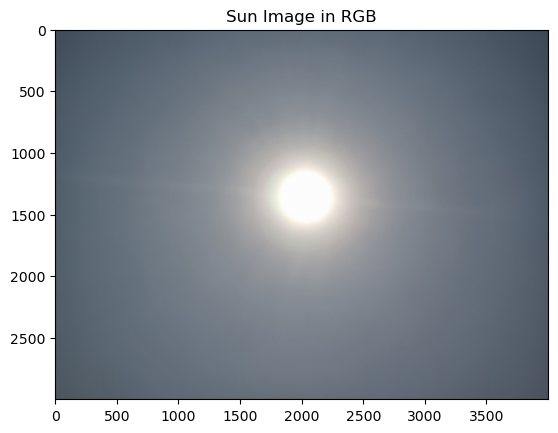

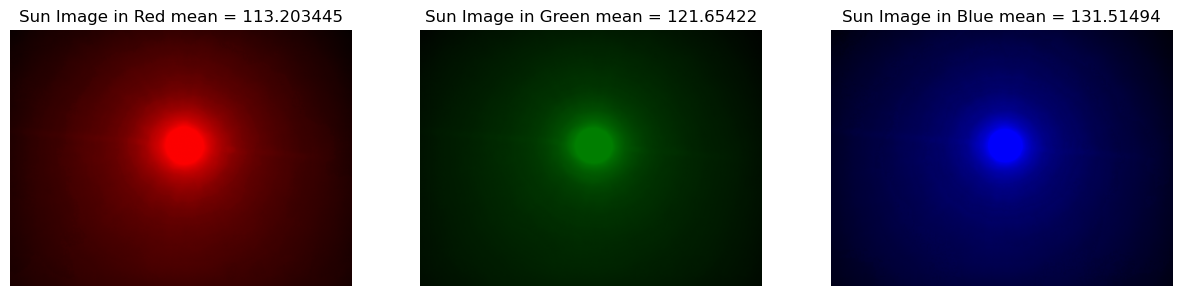

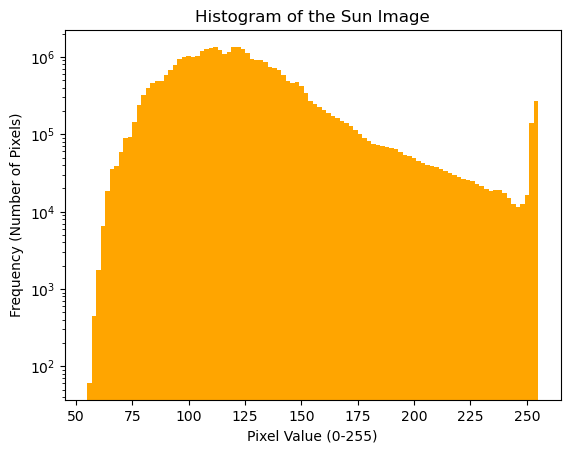

In [2]:
# importing the sun image as a numpy data array and then ploting to verify the image

sun = Image.open('sun.jpg') # Read the image
image = np.array (sun, dtype=np.float32) # Convert the image object into data array
plt.imshow(sun)
plt.title('Sun Image in RGB')
plt.show()

Red = image[:,:,0]
Green = image[:,:,1]
Blue = image[:,:,2]

Images = [Red,Green,Blue]
cmaps = [red_cmap,green_cmap,blue_cmap]
name = ["Red","Green","Blue"]


fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i in range(0,3):
    axes[i].imshow(Images[i], cmap=cmaps[i])
    axes[i].axis('off')
    mean = np.mean(Images[i])
    axes[i].set_title("Sun Image in "+name[i] +" mean = "+str(mean))
    axes[i].set_aspect('equal')
plt.show()

# Making a Histogram of the image
plt.figure()
plt.hist(image.ravel(), bins = 100, color = 'orange', )
plt.yscale('log')
plt.xlabel('Pixel Value (0-255)')
plt.ylabel('Frequency (Number of Pixels)')
plt.title('Histogram of the Sun Image')
plt.show()


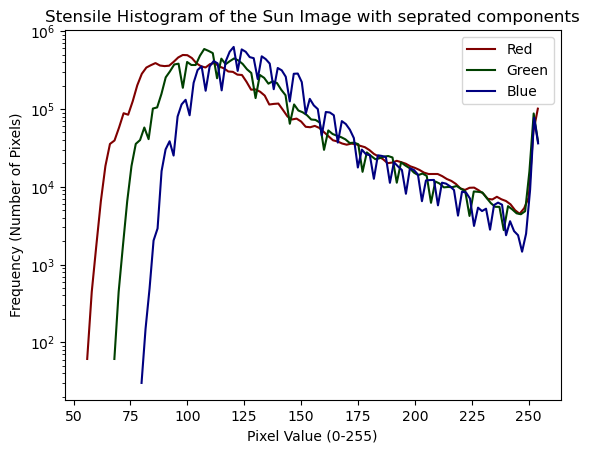

In [3]:
# Making a Histogram of the image in all the three channels with histogram 

plt.figure()
for i in range(3):
    hist, bins = np.histogram(Images[i].ravel(), bins=100) 
    bin_centers = (bins[:-1] + bins[1:]) / 2  # Compute bin centers for plotting
    plt.plot(bin_centers, hist, color=cmaps[i](0.5),label = name[i])  # Line plot instead of bar histogram
plt.yscale('log')
plt.xlabel('Pixel Value (0-255)')
plt.ylabel('Frequency (Number of Pixels)')
plt.title('Stensile Histogram of the Sun Image with seprated components' )
plt.legend()
plt.show()

#### comment on the observed features.

We observe the Imaged is having two two distribution one is centered around pixel value 100 and one we have reaching maximum with saturation of all the pixels at pixel value 255.
This above plot we get to know that the blue light dominates as we expected bec the sky is blue in colour.
And slo sturation is observed.
And lack of low pixel values as we have whole image illuminated with no dark region.

In [4]:
# Following is the defination for finding mead, median, mode and standard deviation # Refered from my Homework 1.
def mean(num_list):
    n = len(num_list)
    sum = 0
    for i in num_list:
        sum+=i
    return sum/n

def median(num_list):
    num_list=np.sort(num_list)
    n = len(num_list)
    if n%2 == 0: #even
        return ( num_list[int(n/2-1)]+num_list[int(n/2-1)] )/2
    if n%2 != 0: #odd
        return num_list[int((n+1)/2-1)]

def std_dev(num_list):

    n = len(num_list)
    mu = mean(num_list)
    sum = 0
    for i in num_list:
        sum += pow(i-mu ,2)
    sigma = np.sqrt( sum/n)
    return sigma

def mode_n(num_list):
    num_list = np.sort(num_list)
    numbers_freq = {}
    for i in num_list:
        if i in numbers_freq:
            numbers_freq[i] += 1
        else:
            numbers_freq[i] = 1
    return float(max(numbers_freq, key=numbers_freq.get))

# Answer : Compute the mean (µ), standard deviation, mode of the distribution.
# we will find the mean of the total distribution

mean_value = mean(image.ravel())
print("The mean of the total distribution is : ",mean_value)

std_dev_value = std_dev(image.ravel())
print("The standard deviation of the total distribution is : ",std_dev_value)

mode_value = mode_n(image.ravel())
print("The mode of the total distribution is : ",mode_value)



The mean of the total distribution is :  122.12417127777778
The standard deviation of the total distribution is :  30.374981131063954
The mode of the total distribution is :  121.0


### (b) (5 marks) Compute and plot the cumulative probability density function.


Taking the Mean and standard distribution value from above to make a CPDF

Taking  mean :  122.12417127777778
Taking standard deviation  :  30.374981131063954


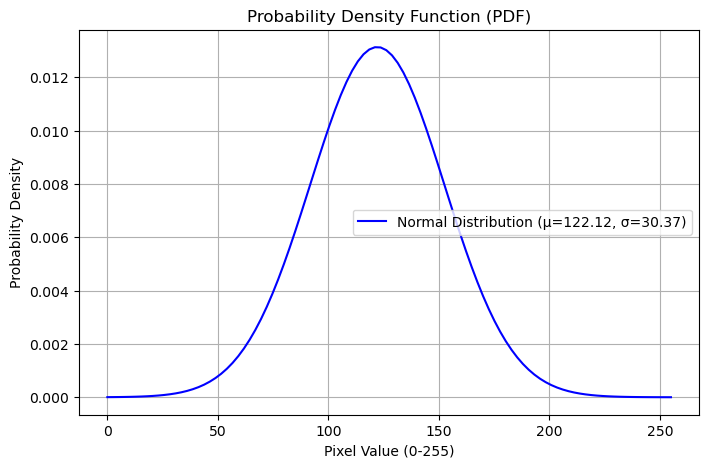

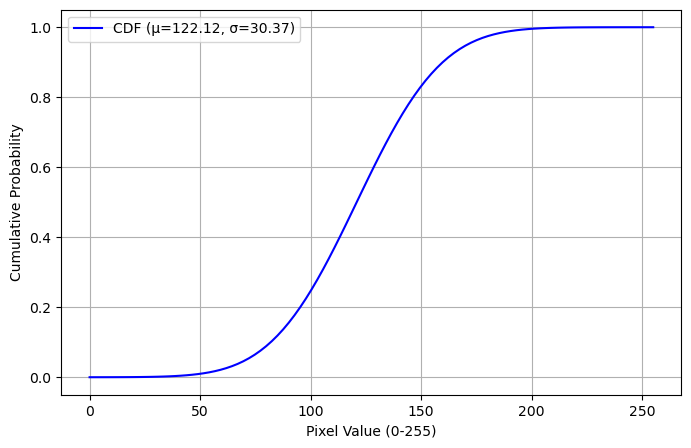

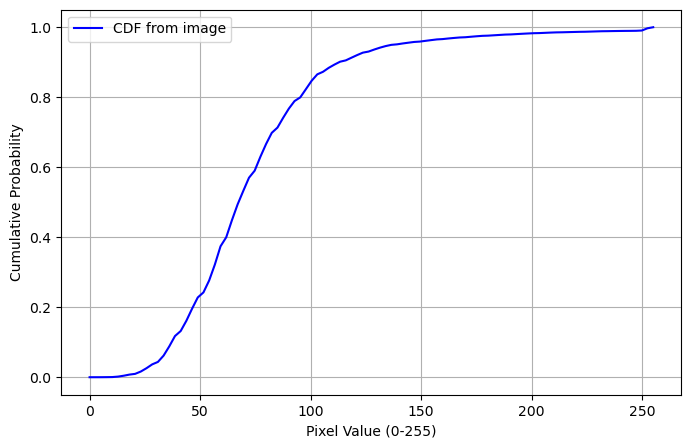

In [5]:
mean_value = mean(image.ravel())
print("Taking  mean : ",mean_value)
std_dev_value = std_dev(image.ravel())
print("Taking standard deviation  : ",std_dev_value)

# ploting the PDF from mean and sigma

mu = mean_value  
sigma = std_dev_value 

# Generate x values (pixel intensity range)
x = np.linspace(0, 255, 100) 

# Compute PDF using normal distribution
pdf = sp.stats.norm.pdf(x, mu, sigma)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(x, pdf, label=f'Normal Distribution (μ={round(mu,2)}, σ={round(sigma,2)})', color='blue')
plt.xlabel('Pixel Value (0-255)')
plt.ylabel('Probability Density')
plt.title('Probability Density Function (PDF)')
plt.legend()
plt.grid()
plt.show()

# ploting the ideal CDF
cdf = np.cumsum(pdf)/np.sum(pdf)
plt.figure(figsize=(8, 5))
#plt.plot(x, pdf, color="red", label="PDF") 
plt.plot(x, cdf, label="CDF (μ={:.2f}, σ={:.2f})".format(mu, sigma), color="blue")
plt.xlabel('Pixel Value (0-255)')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid()
plt.show()


hist, bins = np.histogram(Images[i].ravel(), bins=100) 
# ploting the CDF from the image data
cdf = np.cumsum(hist)/np.sum(hist)
plt.figure(figsize=(8, 5))
#plt.plot(x, pdf, color="red", label="PDF") 
plt.plot(x, cdf, label="CDF from image", color="blue")
plt.xlabel('Pixel Value (0-255)')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid()
plt.show()

### (c) (10 marks) Compute the p-values corresponding to a data point equal to the 5µ or more of the magnitude distribution. What are the standard p-values? Are they bigger or smaller than standard values of p-value. Use: “scipy.stats.f”

In [6]:
five_mue = 0.05* mu
print("Computing pvalu at 5*mu = : ",five_mue)

# Calculating pvalue

def pvalue(x, mu, sigma):
    return 1 - sum(norm.cdf(x, mu, sigma))

five_mue_x = np.linspace(0, five_mue, 10) 
p_value = pvalue(five_mue_x, mu, sigma)
print("The p-value for the pixel intensity 5*mu is : ",p_value)

# calculating standard p value using “scipy.stats.f”
def p_value_std(x, mu, sigma):
    return 1 - sp.stats.f.cdf(x, mu, sigma)

p_value_std = p_value_std(five_mue, mu, sigma)
print("The p-value for the pixel intensity 5*mu is : ",p_value_std)


data_point = five_mue
dfn, dfd = 1, len(image.ravel()) - 1  # Degrees of freedom for F-distribution

p_value = 1 - sp.stats.f.cdf(data_point, dfn, dfd)

print(f"P-value for data point at 5µ: {p_value:.10f}")
print("P-value is much smaller than standard significance levels (0.05 or 0.01).")

Computing pvalu at 5*mu = :  6.106208563888889
The p-value for the pixel intensity 5*mu is :  0.999542393412552
The p-value for the pixel intensity 5*mu is :  1.4009922177926626e-07
P-value for data point at 5µ: 0.0134707845
P-value is much smaller than standard significance levels (0.05 or 0.01).


### (d) (10 marks) Extract the red component and plot the line profile at the midway crossing the Sun.
Comment on the features you observe, and why there is a saturation for the Sun.

Comments : We see the line profile is saturated when the pixels are overlaping with sun image.
this is as the intensity is maximum. 
and the intensity falls sharply around. 
in sun we also see few pixels are not saturated but still have a very high value.

The line profile with maximum intensity is at index :  2016


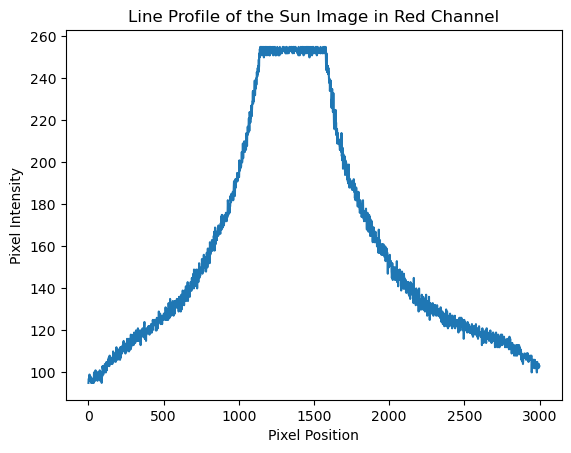

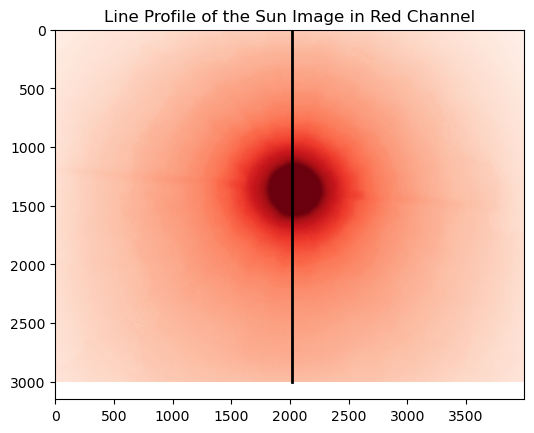

In [7]:
# As the image is not symetric i am first finding the center line of sun by using max intensity.

def line_profile_max(img):
    maxindex = 0
    max_sum = 0
    for i in range(img.shape[0]):
        test_sum = sum(img[:,i])
        if test_sum >= max_sum:
            maxindex = i
            max_sum = test_sum
    print("The line profile with maximum intensity is at index : ",maxindex)
    return maxindex,img[:,maxindex]



Red = image[:,:,0]

maxindex,line_profile = line_profile_max(Red)

plt.plot(line_profile)
plt.xlabel('Pixel Position')
plt.ylabel('Pixel Intensity')
plt.title('Line Profile of the Sun Image in Red Channel')
plt.show()

#plot the line on the image of sun
plt.imshow(Red, cmap='Reds')
plt.plot([maxindex, maxindex],[0, Red.shape[0]],  color='black', linewidth=2)
plt.title('Line Profile of the Sun Image in Red Channel')
plt.show()


### (e) (15 marks) Assuming the size of the Sun to be half an degree, associate an angular scale to the pixel of the image.


The line profile with maximum intensity is at index :  1376
The line profile with maximum intensity is at index :  2016
The line profile with maximum intensity is at index :  2016
250.1
The first point that is saturating is at index :  1133
The last point that is saturating is at index :  1586
The angle of 0.5 degree is equal to  :  453


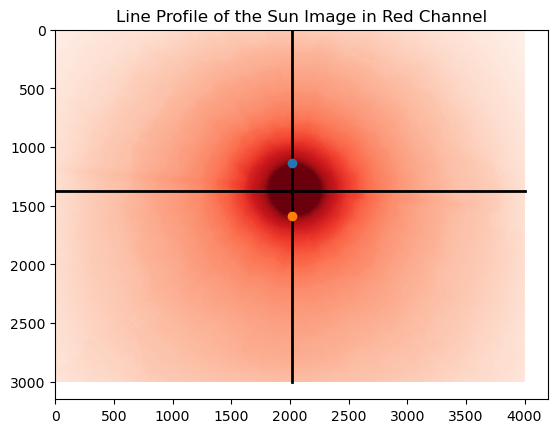

In [8]:
angle_size = 0.5 #degree

Red = image[:,:,0]
img = Red
epsilon =  1+1e-2*0.5

maxindex = 0
max_sum = 0
for i in range(img.shape[0]):
    test_sum = sum(img[i,:])
    if test_sum >= epsilon*max_sum:
        maxindex = i
        max_sum = test_sum
print("The line profile with maximum intensity is at index : ",maxindex)

center_y = maxindex

maxindex = 0
max_sum = 0
for i in range(img.shape[1]):
    test_sum = sum(img[:,i])
    if test_sum >= max_sum:
        maxindex = i
        max_sum = test_sum
print("The line profile with maximum intensity is at index : ",maxindex)

center_x = maxindex


#plot the line on the image of sun
plt.imshow(Red, cmap='Reds')
plt.plot([center_x, center_x],[0, Red.shape[0]],  color='black', linewidth=2)
plt.plot([0, Red.shape[1]],[center_y, center_y],  color='black', linewidth=2)

plt.title('Line Profile of the Sun Image in Red Channel')
#plt.show()

# finding the first and lastpoint that is sacturing

maxindex,line_profile = line_profile_max(Red)


for i in range(len(line_profile)):
    if np.mean(line_profile[i:i+10]) > 250:
        print(np.mean(line_profile[i:i+10]))
        start = i
        break
    
for i in range(len(line_profile)-1,0,-1):
    if np.mean(line_profile[i-10:i]) > 250:
        end = i
        break
print("The first point that is saturating is at index : ",start)
print("The last point that is saturating is at index : ",end)

plt.plot(center_x,start,"o")
plt.plot(center_x,end,"o")

# relate the pixel sze to the angle



print("The angle of 0.5 degree is equal to  : ",(end-start))

The first point that is saturating is at index: 0
The last point that is saturating is at index: 2999
The angular size of the saturated region: 3.3102 degrees


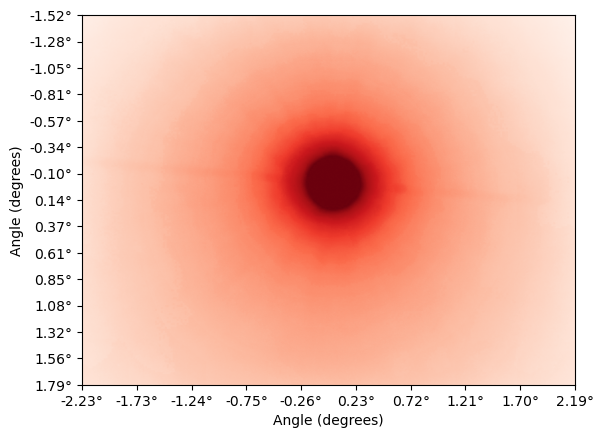

In [9]:
angle_size = 0.5  
pixels_per_angle = 453  
angle_per_pixel = angle_size / pixels_per_angle  


# Convert ticks to angles
xticks = np.linspace(0, Red.shape[1], num=10)  
yticks = np.linspace(0, Red.shape[0], num=15)

xlabels = [f"{(x - center_x) * angle_per_pixel:.2f}°" for x in xticks]
ylabels = [f"{(y - center_y) * angle_per_pixel:.2f}°" for y in yticks]

plt.imshow(Red, cmap='Reds')

plt.xticks(xticks, xlabels)
plt.yticks(yticks, ylabels)

plt.xlabel("Angle (degrees)")
plt.ylabel("Angle (degrees)")

# Finding saturation points
def line_profile_max(img):
    return np.argmax(np.sum(img, axis=1)), np.sum(img, axis=1)

maxindex, line_profile = line_profile_max(Red)

for i in range(len(line_profile) - 10):  
    if np.mean(line_profile[i:i+10]) > 250:
        start = i
        break
for i in range(len(line_profile) - 1, 9, -1):
    if np.mean(line_profile[i-10:i]) > 250:
        end = i
        break

print("The first point that is saturating is at index:", start)
print("The last point that is saturating is at index:", end)

# Convert saturation points to angles
angle_range = abs(end - start) * angle_per_pixel
print(f"The angular size of the saturated region: {angle_range:.4f} degrees")

plt.show()


### (d) (5 marks) Assuming a Gaussian PDF governing the distribution of magnitudes, associate a significance level (in terms of σ) to the saturated points to the Sun.


### (f) (15 marks) Take first 100 data points of the line profile. Fit an exponential profile by taking natural log in y-axis and doing linear fit with pixel numbers.


The slope of the line is :  0.0004878575645191982
The intercept of the line is :  12.702955495060085


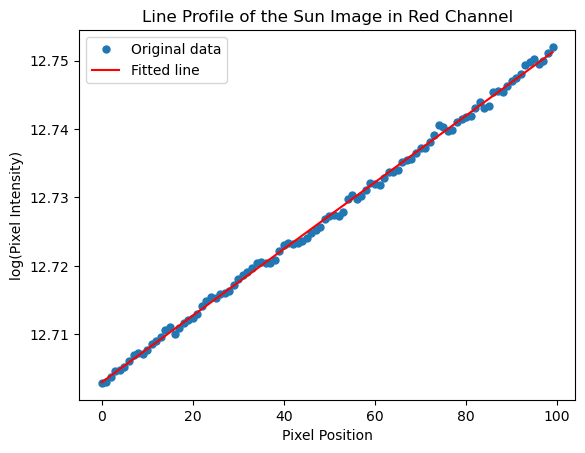

log(pixelvalue) = 4.88e-04 * position + 1.27e+01
pixelvalue = exp(1.27e+01) * exp(4.88e-04 * position)


In [10]:
maxindex,line_profile = line_profile_max(Red)

x = np.arange(100)
y = np.log(line_profile[:100])

slope, intercept = np.polyfit(x, y, 1)
print("The slope of the line is : ",slope)
print("The intercept of the line is : ",intercept)

plt.plot(x, y, '.', label='Original data', markersize=10)
plt.plot(x, slope*x + intercept, 'r', label='Fitted line')
plt.xlabel('Pixel Position')
plt.ylabel('log(Pixel Intensity)')
plt.title('Line Profile of the Sun Image in Red Channel')
plt.legend()
plt.show()

print(f"log(pixelvalue) = {slope:.2e} * position + {intercept:.2e}")
print(f"pixelvalue = exp({intercept:.2e}) * exp({slope:.2e} * position)")



### (g) (20 marks) Using red component of the image mentioned in (a), compute the histogram with bins=10. Assuming an exponential probability density function (PDF), analytically work out the $χ^2$ and reduced $χ^2_v$ for the histogram.
The exponential PDF is given by, p(x; λ) = λe−λx for x ≥ 0, and 0 for x < 0. λ is the rate
parameter, and is approximated to the inverse of the mean of the observed distribution.

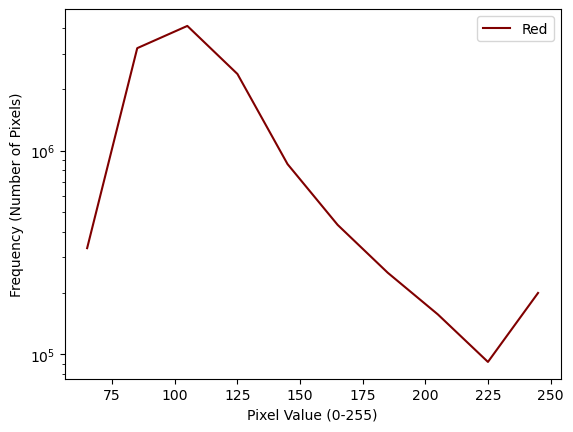

[ 332408 3190064 4101933 2382092  859932  432519  251753  157166   91833
  200300]


In [11]:
plt.figure()
hist, bins = np.histogram(Red.ravel(), bins=10) 
bin_centers = (bins[:-1] + bins[1:]) / 2 
plt.plot(bin_centers, hist, color=cmaps[0](0.5),label = name[0]) 
plt.yscale('log')
plt.xlabel('Pixel Value (0-255)')
plt.ylabel('Frequency (Number of Pixels)')
plt.legend()
plt.show()
print(hist)


In [12]:

O = np.array(hist)

A = np.exp(12.7)  
B = 4.88e-4       
positions = np.arange(len(O))

E = A * np.exp(B * positions)
print(positions)
print("Observed values:", O)
print("Expected values:", E)
print(np.std(O) )

chi2 = np.sum(((O - E) ** 2) / np.std(O) ** 2)

dof = len(O) - 2

chi2_r = chi2 / dof

print("Chi square = ",chi2)
print("Reduced Chi square = ",chi2_r)


[0 1 2 3 4 5 6 7 8 9]
Observed values: [ 332408 3190064 4101933 2382092  859932  432519  251753  157166   91833
  200300]
Expected values: [327747.90187381 327907.88188187 328067.93997923 328228.076204
 328388.29059432 328548.58318834 328708.95402424 328869.4031402
 329029.93057444 329190.53636519]
1394647.2629289457
Chi square =  13.909219410294243
Reduced Chi square =  1.7386524262867804


# Q 2

(10 marks) A student measures the period of a pendulum and obtains the following values.

Trail 1     2       3   4   5   6   7   8   9

Period 1.35 1.34 1.32 1.36 1.33 1.34 1.37 1.35

(a) Find the mean and standard deviation of the measurements and standard deviation of the mean.

(b) Estimate the probability that another single measurement will fall within 0.02 of the mean.

In [13]:
# Following is the defination for finding mead, median, mode and standard deviation # Refered from my Homework 1.
def mean(num_list):
    n = len(num_list)
    sum = 0
    for i in num_list:
        sum+=i
    return sum/n

def median(num_list):
    num_list=np.sort(num_list)
    n = len(num_list)
    if n%2 == 0: #even
        return ( num_list[int(n/2-1)]+num_list[int(n/2-1)] )/2
    if n%2 != 0: #odd
        return num_list[int((n+1)/2-1)]

def std_dev(num_list):

    n = len(num_list)
    mu = mean(num_list)
    sum = 0
    for i in num_list:
        sum += pow(i-mu ,2)
    sigma = np.sqrt( sum/n)
    return sigma

def mode_n(num_list):
    num_list = np.sort(num_list)
    numbers_freq = {}
    for i in num_list:
        if i in numbers_freq:
            numbers_freq[i] += 1
        else:
            numbers_freq[i] = 1
    return float(max(numbers_freq, key=numbers_freq.get))

In [14]:
Trail = [1,     2,       3,   4,   5,   6,   7,   8,   9,]
Period = [1.35 ,1.34 ,1.32 ,1.36 ,1.33 ,1.34 ,1.37, 1.35]

mu = mean(Period)
print("mean : ",mu)
sigma = std_dev(Period)
print("standard deviation  : ",sigma)

sigma_mu = sigma / np.sqrt(len(Period))
print("Standard deviation of the mean : ",sigma_mu)



mean :  1.345
standard deviation  :  0.015000000000000013
Standard deviation of the mean :  0.005303300858899111


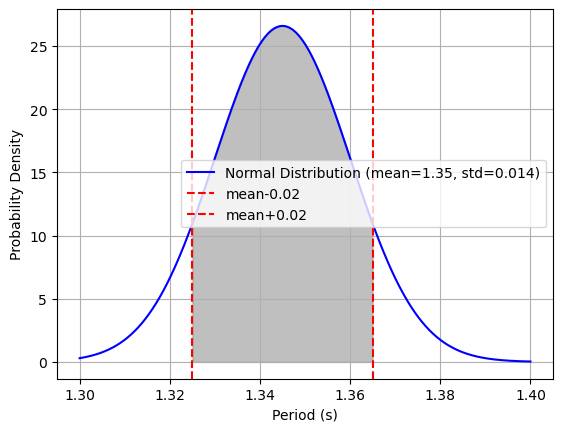

Probability that a new measurement is within mu±0.02  0.8175775605482642
That is 81.76 %


In [15]:
# 0.02 of mean
episolon =  0.02

l = mu - episolon 
h = mu + episolon 
#make a plot of the normal distribution and dray the lines at l ahd h and hilight the middle area
x = np.linspace(1.3, 1.4, 1000)
pdf = sp.stats.norm.pdf(x, loc=mu, scale=sigma)
plt.plot(x, pdf, label='Normal Distribution (mean=1.35, std=0.014)', color='blue')
plt.fill_between(x, pdf, where=(x>l) & (x<h), color='gray', alpha=0.5)
plt.axvline(l, color='red', linestyle='--', label='mean-0.02')
plt.axvline(h, color='red', linestyle='--', label='mean+0.02')
plt.xlabel('Period (s)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid()
plt.show()


probability = sp.stats.norm.cdf(h, loc=mu, scale=sigma)-sp.stats.norm.cdf(l, loc=mu, scale=sigma)
print("Probability that a new measurement is within mu±0.02 ",probability)
print(f"That is {round(100*probability,2)} %")

# Q 3. (10 marks)
Its in the pdf

## 4. (20 marks) 
Its in the pdf

# 5. (10 marks) 
From the red and green images from 1 (a), one makes an hypothesis that they come from same distribution. Perform F-test and find out if they are indeed from same population.


In [16]:
import scipy as sp

def fstats(var1, var2):
    return max(var1, var2) / min(var1, var2) 

def pvalue_fn(Data1, Data2):
    var_d1 = np.var(Data1, ddof=1) 
    var_d2 = np.var(Data2, ddof=1)
    
    F_statistic = fstats(var_d1, var_d2)
    df1 = len(Data1) - 1
    df2 = len(Data2) - 1
    p_value = 2 * min(sp.stats.f.cdf(F_statistic, df1, df2), 1 - sp.stats.f.cdf(F_statistic, df1, df2))
    
    return p_value

sun = Image.open('sun.jpg')  
image = np.array(sun, dtype=np.float32)  

# Lets Assume that the Red and the Green come from the same distribution
Red = image[:,:,0].flatten()
Green = image[:,:,1].flatten()

#Doing F test
p_value = pvalue_fn(Red, Green)

print(f"P-value: {p_value}")

# Comparing the pvalue to significant value.
if p_value < 0.05:
    print("The P value is small, So the varriances is significantly different. The Red and Green may come from different distribution.")
    print("The hypothisis is rejected")
else:
    print("The P value is larger, So the varriances is almost same. The Red and Green may come from same distribution.")
    print("The hypothisis is not rejected")



P-value: 2.220446049250313e-16
The P value is small, So the varriances is significantly different. The Red and Green may come from different distribution.
The hypothisis is rejected
